In [112]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

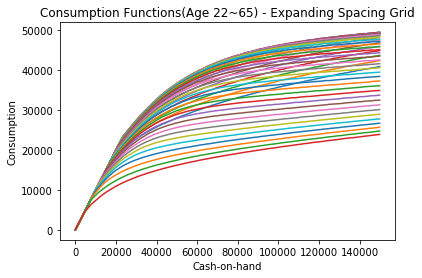

In [113]:
base_path = '/Users/Quintus/Google Drive/Dynamic Programming/code'
c_func_fp = os.path.join(base_path, 'results', 'c function_10_0.82_4.xlsx')
c_df = pd.read_excel(c_func_fp)

end = 15000000 / 100
grid_w = np.arange(1, end, 100)
for age in range(22, 66):
    spline = CubicSpline(c_df[str(100)], c_df[str(age)], bc_type='natural')
    c = spline(grid_w)
    plt.plot(grid_w, c, label=str(age))
plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22~65) - Expanding Spacing Grid')
# plt.legend()
plt.show()

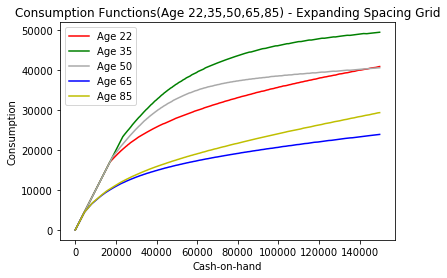

In [114]:
grid_w = np.arange(1, end, 100)

spline = CubicSpline(c_df[str(100)], c_df['22'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='r', label='Age 22')

spline = CubicSpline(c_df[str(100)], c_df['35'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='g', label='Age 35')

spline = CubicSpline(c_df[str(100)], c_df['50'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='darkgrey', label='Age 50')

spline = CubicSpline(c_df[str(100)], c_df['65'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='b', label='Age 65')

spline = CubicSpline(c_df[str(100)], c_df['85'], bc_type='natural')
c = spline(grid_w)
plt.plot(grid_w, c, color='y', label='Age 85')

plt.xlabel('Cash-on-hand')
plt.ylabel('Consumption')
plt.title('Consumption Functions(Age 22,35,50,65,85) - Expanding Spacing Grid')
plt.legend()
plt.show()

### Plotting the Utility Function

In [18]:
def utility(c, gamma):
    return c**(1-gamma) / (1-gamma)

In [46]:
gamma = 2
c = np.arange(1, 100).astype('float')

In [47]:
u = utility(c, gamma)

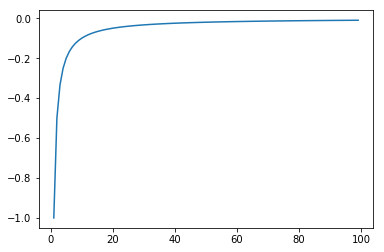

In [48]:
plt.plot(c, u)
plt.show()

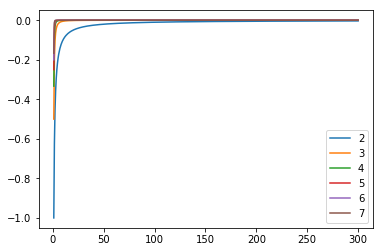

In [101]:
gamma_list = np.arange(2, 8, 1)
c = np.linspace(1, 300, 500).astype('float')

for gamma in gamma_list:
    u = utility(c, gamma)
    plt.plot(c, u)
plt.legend(gamma_list)
plt.show()

###  Curvature of Utility Funcs - measure at which step the curvature disappear

In [95]:

gamma_list = np.arange(2, 8, 0.5)
c = np.linspace(0.1, 300, 500).astype('float')
precision = 10**(-5)

In [96]:
curv = np.zeros((2, len(gamma_list)))
curv[0, :] = gamma_list

for i, gamma in np.ndenumerate(gamma_list):
    u = utility(c, gamma)
    u_diff = np.diff(u)
    curv[1, i] = np.argmax(u_diff < precision)
print(curv)

[[  2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5]
 [408.  136.   65.   38.   26.   19.   15.   12.   10.    9.    8.    7. ]]


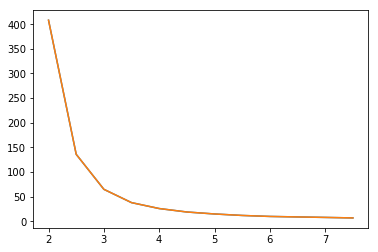

In [99]:
plt.plot(curv[0, :], curv[1, :])
plt.show()